# Exploratory Data Analysis

Project description:
The Aim of the project is create a model for predicting the probability of a child between age of 6-months and 5 years getting Vit A supplementation. 




## Data Dictionary
*Child_Age*: Age of child(in years) <br>
*Sex*: Sex of Child (1=Male, 2=Female)<br>
*Mother_Age*: Age of Mother (years)<br>
*Distance*: Distance from Health facility(km)<br>
*Transport_Means* :Means of transport to the health facility(1=Walking, 2=Bycicle, 3=Motor cycle,4=Vehicle 5=other )<br>
*Time*: Time taken to reach the health facility (hours)<br>
*Below_5_Years*: Number of under five years children in the household<br>
*Marital_status*: Marital status of the mother/caregiver(1=married, 2=single, 3=divorced, 4=widow(er), 5=other)<br>
*Polygamy*: Whether mother is in polygamous marriage(1=In a polygamous, 2=not in a polygamous)<br> 
*Together*: Whether parents live together (1=lives with spouse, 2=do not live with spouse)<br>
*Education*:Mother/caregiver's level of education (1=Did not attend school, 2=Nusery, 3=primary, 4=secondary, 5=Tertiary (diploma or certificate), 6=University 7=other)<br>
*Employmment*: Mother/caregiver employment status (1=Not employed, 2=employed, 3=self-employed, 4=other)<br>
*Religion*: Mother/caregiver religion (1=protestant, 2=catholic, 3=muslim 4=other)<br>
*Group_Membershi*: mother/caregiver belongs to a community group (1=Yes, 2=No)<br>
*Place_of_Birth*: Place of giving birth (1=home, 2=clinic, 3=hospital, 4=other)<br>
*Y*: Vitamin A suplementation (Y dependent variable) (1=yes, 2=No)<br>
*Place_of_Sup*: place of vitamin supplementation (1=Health facility, 2=Home 3=School or ECD)<br>
*Income*: Mother/caregiver monthly Income (USD)<br>
*Healthcare_Exp*: Mother/Caregiver monthly healthcare expenditure (USD)<br>




## Setting up the environment

In [ ]:
# The code has several repetitions which may not be ideal for production but a begginer may find it useful for easy undersatnding 
# I would recommend use of custom functions and methods and classes or even the sklearn pipeline for reusability and keeping your code clean

In [1]:
#plotting 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#data manipulation
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#setting environment
import pandas_profiling
from IPython.display import display             
import warnings                                 
warnings.filterwarnings('ignore') 
import os                                       
import gc

In [2]:
# setting aesthetics
pd.options.display.max_columns =200
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

%pylab inline
%matplotlib inline
plt.rcParams["figure.figsize"]=15,8
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


## Load data

In [3]:
kilifi=pd.read_csv("data/Kilifi.csv")
kwale=pd.read_csv("data/Kwale.csv")
siaya=pd.read_csv("data/Siaya.csv")

In [4]:
kilifi_d=pd.read_csv("data_decode/Kilifi.csv")
kwale_d=pd.read_csv("data_decode/Kwale.csv")
siaya_d=pd.read_csv("data_decode/Siaya.csv")

## Data Dimension

In [5]:
print('Kilifi data shape: {} Rows, {} Columns'.format(*kilifi.shape))
print('Kwale data shape: {} Rows, {} Columns'.format(*kwale.shape))
print('Siaya data shape: {} Rows, {} Columns'.format(*siaya.shape))

Kilifi data shape: 224 Rows, 22 Columns
Kwale data shape: 238 Rows, 22 Columns
Siaya data shape: 256 Rows, 22 Columns


## Viewing the data

In [6]:
display("Kilifi dataset")
display(kilifi.head())
display("Kwale dataset")
display(kwale.head())
display("siaya dataset")
display(siaya.head())

'Kilifi dataset'

,Child ID,Mother ID,Child_Age,Sex,Mother_Age,Distance,Transport_Means,Time,Below_5_years,Marital_Status,Polygamy,Together,Education,Employment,Religion,Group_Membership,Place_of_Birth,Unnamed: 17,Place _of_Sup,Income,Healthcare_Exp,Y
0,C001,M001,1.33,1,35.00,2.00,3.00,0.25,1.00,1.00,2.00,1.00,3.00,3.00,3.00,1.00,2,nan,1.00,29.78,14.89,1.00
1,C002,M002,1.50,1,26.00,2.00,1.00,0.75,3.00,1.00,2.00,2.00,3.00,3.00,3.00,2.00,3,nan,1.00,nan,nan,1.00
2,C003,M003,1.08,1,29.00,2.00,3.00,0.17,1.00,1.00,1.00,1.00,4.00,1.00,1.00,1.00,3,nan,2.00,19.85,7.94,1.00
3,C004,M004,1.50,2,28.00,2.00,3.00,0.25,2.00,1.00,2.00,1.00,3.00,2.00,3.00,2.00,3,nan,1.00,44.67,12.90,1.00
4,C005,M005,nan,2,25.00,2.00,1.00,0.83,1.00,1.00,2.00,2.00,4.00,1.00,1.00,2.00,3,nan,1.00,nan,17.87,1.00


'Kwale dataset'

,Child ID,Mother ID,Child_Age,Sex,Mother_Age,Distance,Transport_Means,Time,Below_5_years,Marital_Status,Polygamy,Together,Education,Employment,Religion,Group_Membership,Place_of_Birth,Unnamed: 17,Place _of_Sup,Income,Healthcare_Exp,Y
0,C001,M001,2.33,1.00,27.00,0.20,1,0.25,1.00,1.00,2.00,1.00,3,1,3.00,2.00,3.00,nan,2.00,0.00,0.00,1
1,C002,M002,4.50,2.00,29.00,0.20,1,0.17,2.00,1.00,1.00,1.00,1,1,3.00,2.00,3.00,nan,3.00,0.00,0.00,1
2,C003,M003,3.92,1.00,25.00,0.30,1,0.17,1.00,1.00,2.00,1.00,3,3,3.00,1.00,3.00,nan,2.00,29.78,0.00,1
3,C004,M004,2.58,2.00,24.00,0.20,1,0.17,1.00,1.00,2.00,1.00,4,3,3.00,1.00,3.00,nan,2.00,39.70,0.00,1
4,C005,M005,1.92,1.00,nan,0.50,1,0.33,1.00,2.00,nan,nan,1,1,3.00,2.00,3.00,nan,2.00,0.00,0.00,1


'siaya dataset'

,Child ID,Mother ID,Child_Age,Sex,Mother_Age,Distance,Transport_Means,Time,Below_5_years,Marital_Status,Polygamy,Together,Education,Employment,Religion,Group_Membership,Place_of_Birth,Unnamed: 17,Place _of_Sup,Income,Healthcare_Exp,Y
0,C001,M001,0.75,1,19.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,2.00,3.00,1.00,2.00,3.00,nan,2.00,19.85,9.93,1.00
1,C002,M002,5.00,1,29.00,2.00,4.00,0.75,1.00,1.00,2.00,1.00,5.00,2.00,2.00,1.00,1.00,nan,3.00,49.63,24.81,1.00
2,C003,M003,2.00,2,29.00,1.00,4.00,0.33,1.00,4.00,nan,nan,3.00,3.00,1.00,1.00,3.00,nan,2.00,29.78,14.89,1.00
3,C004,M004,2.00,1,22.00,0.50,3.00,0.25,1.00,2.00,nan,nan,3.00,3.00,1.00,2.00,3.00,nan,2.00,19.85,9.93,1.00
4,C005,M005,3.00,1,31.00,1.50,4.00,0.75,1.00,1.00,2.00,2.00,3.00,3.00,1.00,1.00,3.00,nan,2.00,49.63,19.85,1.00


### Assumptions and considerations about the data

*Child Id and Mother ID*: is unlikely to be useful because they are mainly used for identification and ordering purposes<br>
*Age of Child*: Is likely to be useful to determine if the child is eligible for Vit A supplementation<br>
*Distance from Health facility*: can be useful in determining mother's ability to reach the hospital for supplementation<br>
*Means of transport*: combined woth distance from health facility can useful in determining caregiver's ability to reach the health facility for supplementation<br>
*Marital Status*: is likely to  be useful because the partner is likely to influence the decision to go for Vit A supplementation or not<br>
Education: is likely to be useful to determine mother's knowledge of the importance of Vit A supplementation<br>
Religion: can be useful bacause religious belief influences the decision to take the child for a healthcare<br>
Group membership : is unlikely to be useful<br>
Place of birth: can be useful for determining the customary or religious stereotypes on scientific healthcare<br>
Income: can be useful to determine mothers ability to afford healthcare or the transport expenses involved<br>
Healthcare Expenditure: can be useful for determining the mothers ability and willingness to spend on health<br>





## Data explorations

### data types

In [7]:
display("kilifi dataset")
display(kilifi.dtypes.value_counts())
display("Kwale dataset")
display(kwale.dtypes.value_counts())
display("Siaya dataset")
display(siaya.dtypes.value_counts())


'kilifi dataset'

float64    18
object      2
int64       2
dtype: int64

'Kwale dataset'

float64    16
int64       4
object      2
dtype: int64

'Siaya dataset'

float64    19
object      2
int64       1
dtype: int64

### Creating data sumary

In [8]:
profile = pandas_profiling.ProfileReport(kilifi)
profile.to_file(outputfile="reports/kilifi.html")
profile = pandas_profiling.ProfileReport(kwale)
profile.to_file(outputfile="reports/kwale.html")
profile = pandas_profiling.ProfileReport(siaya)
profile.to_file(outputfile="reports/Siaya.html")

## Data Visualization

Pandas profilling gives all the visualization details but lets highlight some of the important trends,
patterns, correlations and characteristics of the dataset

#### Statistics about numerical data

In [9]:
# statistics about the numerical data
display("Kilifi dataset")
display(kilifi.describe())
display("Kwale dataset")
display(kwale.describe())
display("siaya dataset")
display(siaya.describe())

'Kilifi dataset'

,Child_Age,Sex,Mother_Age,Distance,Transport_Means,Time,Below_5_years,Marital_Status,Polygamy,Together,Education,Employment,Religion,Group_Membership,Place_of_Birth,Unnamed: 17,Place _of_Sup,Income,Healthcare_Exp,Y
count,222.00,224.00,221.00,215.00,223.00,224.00,198.00,220.00,186.00,194.00,223.00,223.00,222.00,221.00,224.00,0.00,138.00,196.00,206.00,219.00
mean,2.71,1.44,29.75,5.58,1.54,0.63,1.64,1.19,1.81,1.27,2.62,1.85,1.92,1.54,2.30,nan,2.33,84.31,7.91,1.36
std,1.35,0.50,7.25,7.64,0.97,0.56,0.68,0.55,0.40,0.44,1.02,0.93,1.15,0.50,0.84,nan,0.74,71.92,10.10,0.48
min,0.25,1.00,16.00,0.10,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,nan,1.00,2.98,0.20,1.00
25%,1.50,1.00,24.00,1.00,1.00,0.25,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,2.00,nan,2.00,29.78,1.99,1.00
50%,2.92,1.00,29.00,2.00,1.00,0.50,2.00,1.00,2.00,1.00,3.00,1.00,1.00,2.00,3.00,nan,2.00,59.55,3.72,1.00
75%,4.00,2.00,35.00,5.75,1.50,0.83,2.00,1.00,2.00,2.00,3.00,3.00,3.00,2.00,3.00,nan,3.00,119.11,9.93,2.00
max,5.00,2.00,62.00,30.00,4.00,3.00,4.00,4.00,2.00,2.00,6.00,3.00,4.00,2.00,3.00,nan,3.00,397.02,74.44,2.00


'Kwale dataset'

,Child_Age,Sex,Mother_Age,Distance,Transport_Means,Time,Below_5_years,Marital_Status,Polygamy,Together,Education,Employment,Religion,Group_Membership,Place_of_Birth,Unnamed: 17,Place _of_Sup,Income,Healthcare_Exp,Y
count,237.00,237.00,229.00,234.00,238.00,238.00,237.00,228.00,209.00,209.00,238.00,238.00,235.00,235.00,236.00,0.00,234.00,238.00,238.00,238.00
mean,2.60,1.49,29.24,4.98,1.69,0.78,1.55,1.18,1.63,1.14,2.76,1.48,2.24,1.44,2.35,nan,2.08,28.53,4.34,1.02
std,1.19,0.50,7.43,32.55,0.99,0.42,0.67,0.55,0.48,0.37,1.14,0.83,0.92,0.50,0.91,nan,0.51,43.25,7.70,0.13
min,0.50,1.00,16.00,0.20,1.00,0.02,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,nan,1.00,0.00,0.00,1.00
25%,1.67,1.00,24.00,1.50,1.00,0.50,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,nan,2.00,4.22,0.99,1.00
50%,2.57,1.00,28.00,2.50,1.00,0.75,1.00,1.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,nan,2.00,15.88,2.98,1.00
75%,3.50,2.00,33.00,4.00,3.00,1.00,2.00,1.00,2.00,1.00,3.00,2.00,3.00,2.00,3.00,nan,2.00,29.78,4.96,1.00
max,4.92,2.00,57.00,500.00,4.00,2.00,4.00,4.00,2.00,3.00,6.00,3.00,4.00,2.00,4.00,nan,3.00,347.39,89.33,2.00


'siaya dataset'

,Child_Age,Sex,Mother_Age,Distance,Transport_Means,Time,Below_5_years,Marital_Status,Polygamy,Together,Education,Employment,Religion,Group_Membership,Place_of_Birth,Unnamed: 17,Place _of_Sup,Income,Healthcare_Exp,Y
count,256.00,256.00,254.00,252.00,254.00,253.00,251.00,251.00,203.00,199.00,251.00,247.00,252.00,242.00,249.00,0.00,236.00,256.00,256.00,255.00
mean,2.89,1.49,28.26,1.33,1.69,0.48,1.68,1.27,1.71,1.19,3.05,2.33,1.17,1.38,2.71,nan,2.32,30.38,7.53,1.07
std,1.36,0.50,6.67,1.10,1.12,0.33,0.71,0.72,0.45,0.39,0.84,1.07,0.38,0.49,0.57,nan,0.77,41.09,10.08,0.26
min,0.50,1.00,17.00,0.12,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,nan,1.00,0.00,0.00,1.00
25%,1.81,1.00,24.00,0.50,1.00,0.25,1.00,1.00,1.00,1.00,2.50,1.00,1.00,1.00,3.00,nan,2.00,5.71,1.99,1.00
50%,3.00,1.00,27.00,1.00,1.00,0.50,2.00,1.00,2.00,1.00,3.00,3.00,1.00,1.00,3.00,nan,2.00,19.85,4.96,1.00
75%,4.00,2.00,32.00,2.00,3.00,0.58,2.00,1.00,2.00,1.00,3.00,3.00,1.00,2.00,3.00,nan,3.00,29.78,9.93,1.00
max,8.00,2.00,55.00,7.00,4.00,2.00,4.00,4.00,2.00,2.00,5.00,4.00,2.00,2.00,3.00,nan,4.00,297.77,99.26,2.00


**Observations**
* The vit A supplementation has a higher Standard deviation in Kilifi dataset despite being a numerical value because some values were coded as 98 which means that the respondent did not have an answer for the question



#### missing values

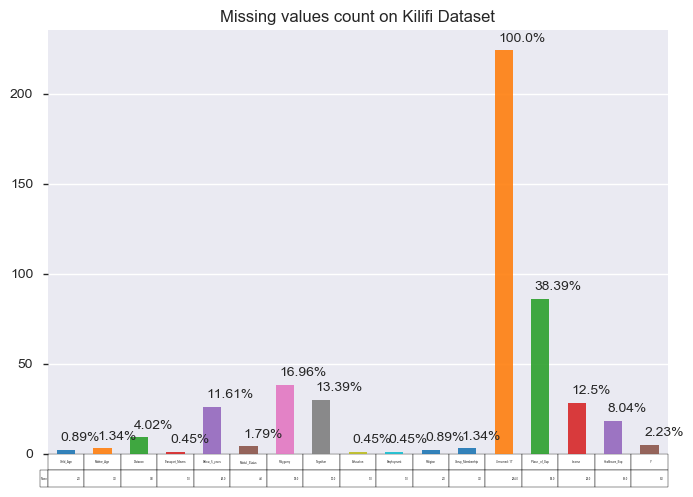

In [10]:
# percentage Missing values on kilifi data

# number of rows
rows_length = kilifi.shape[0]
# fields with missing value count
fields_with_nan_length = kilifi.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind='bar', alpha=0.9, title='Missing values count on Kilifi Dataset', table=True)
ax.xaxis.set_visible(False) # hide x axis labels


# write percentage on top of each bar
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')

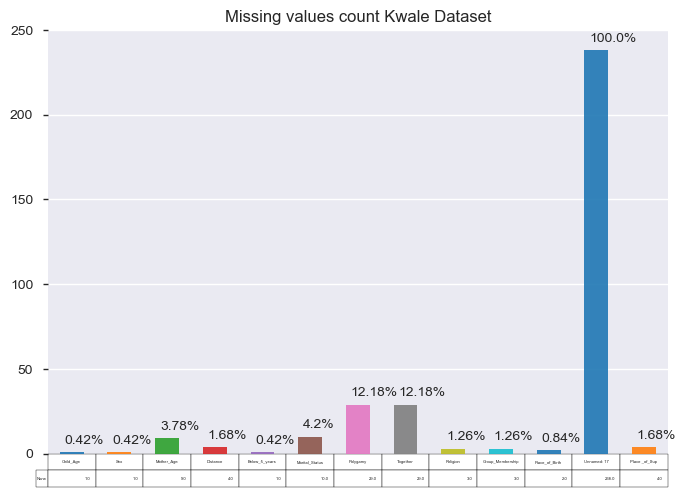

In [11]:
# percentage Missing values on kwale data

# number of rows
rows_length = kwale.shape[0]
# fields with missing value count
fields_with_nan_length = kwale.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind='bar', alpha=0.9, title='Missing values count Kwale Dataset', table=True)
ax.xaxis.set_visible(False) # hide x axis labels


# write percentage on top of each bar
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')

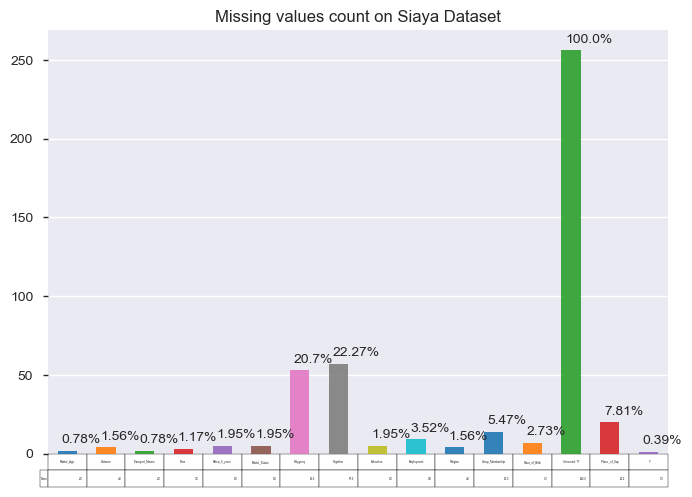

In [12]:
# percentage Missing values on Siaya data

# number of rows
rows_length = siaya.shape[0]
# fields with missing value count
fields_with_nan_length = siaya.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind='bar', alpha=0.9, title='Missing values count on Siaya Dataset', table=True)
ax.xaxis.set_visible(False) # hide x axis labels


# write percentage on top of each bar
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')

### Vitamin A Supplementation pie chart for kilifi county

In [13]:
# Specifing the parameters of the graphs
plt.figure(figsize=(13,6))
plot_params = {
    'kind': 'pie',
    'startangle': 90,
    'autopct': '%1.1f%%',
    'colors': ['tomato', 'lightgreen']
}

<Figure size 1300x600 with 0 Axes>

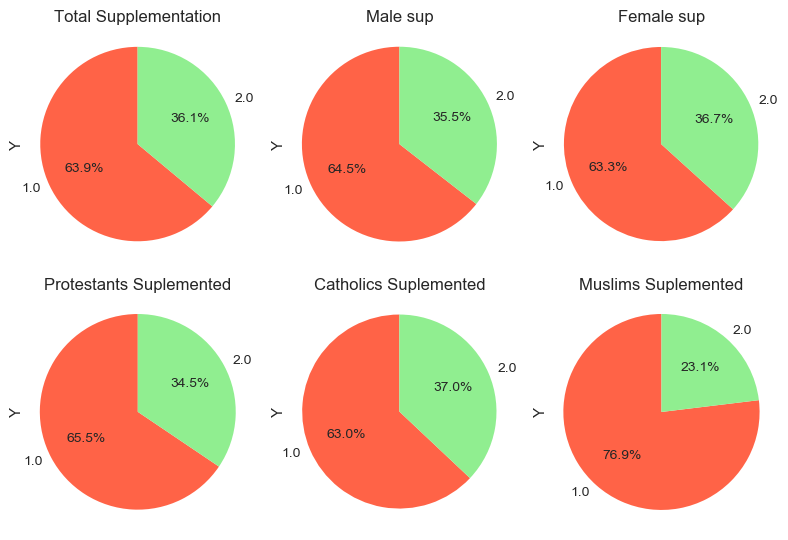

In [14]:



# Plots a pie chart graph of kids who were suplemented against those who were not
plt.subplot2grid((2,3), (0,0))
kilifi.Y.value_counts() \
.plot(title='Total Supplementation', **plot_params).axis('equal')


# Sex
df_male = kilifi.Y[kilifi.Sex == 1.00].value_counts(normalize=True, sort=False)
df_female = kilifi.Y[kilifi.Sex == 2.00].value_counts(normalize=True, sort=False)

## male 
plt.subplot2grid((2,3),(0,1))
df_male.plot(title='Male sup', **plot_params).axis('equal')

## female s
plt.subplot2grid((2,3),(0,2))
df_female.plot(title='Female sup', **plot_params).axis('equal')


#religion
protestant=kilifi.Y[kilifi.Religion==1.00].value_counts(normalize=True, sort=False)
catholic=kilifi.Y[kilifi.Religion==2.00].value_counts(normalize=True, sort=False)
muslim=kilifi.Y[kilifi.Religion==3.00].value_counts(normalize=True, sort=False)

# plot religion
plt.subplot2grid((2,3),(1,0))
protestant.plot(title='Protestants Suplemented', **plot_params).axis('equal')
plt.subplot2grid((2,3),(1,1))
catholic.plot(title='Catholics Suplemented', **plot_params).axis('equal')
plt.subplot2grid((2,3),(1,2))
muslim.plot(title='Muslims Suplemented', **plot_params).axis('equal')



plt.tight_layout()
plt.show()

### Vitamin A Supplementation pie chart for kwale county

In [15]:
kwale.head()

,Child ID,Mother ID,Child_Age,Sex,Mother_Age,Distance,Transport_Means,Time,Below_5_years,Marital_Status,Polygamy,Together,Education,Employment,Religion,Group_Membership,Place_of_Birth,Unnamed: 17,Place _of_Sup,Income,Healthcare_Exp,Y
0,C001,M001,2.33,1.00,27.00,0.20,1,0.25,1.00,1.00,2.00,1.00,3,1,3.00,2.00,3.00,nan,2.00,0.00,0.00,1
1,C002,M002,4.50,2.00,29.00,0.20,1,0.17,2.00,1.00,1.00,1.00,1,1,3.00,2.00,3.00,nan,3.00,0.00,0.00,1
2,C003,M003,3.92,1.00,25.00,0.30,1,0.17,1.00,1.00,2.00,1.00,3,3,3.00,1.00,3.00,nan,2.00,29.78,0.00,1
3,C004,M004,2.58,2.00,24.00,0.20,1,0.17,1.00,1.00,2.00,1.00,4,3,3.00,1.00,3.00,nan,2.00,39.70,0.00,1
4,C005,M005,1.92,1.00,nan,0.50,1,0.33,1.00,2.00,nan,nan,1,1,3.00,2.00,3.00,nan,2.00,0.00,0.00,1


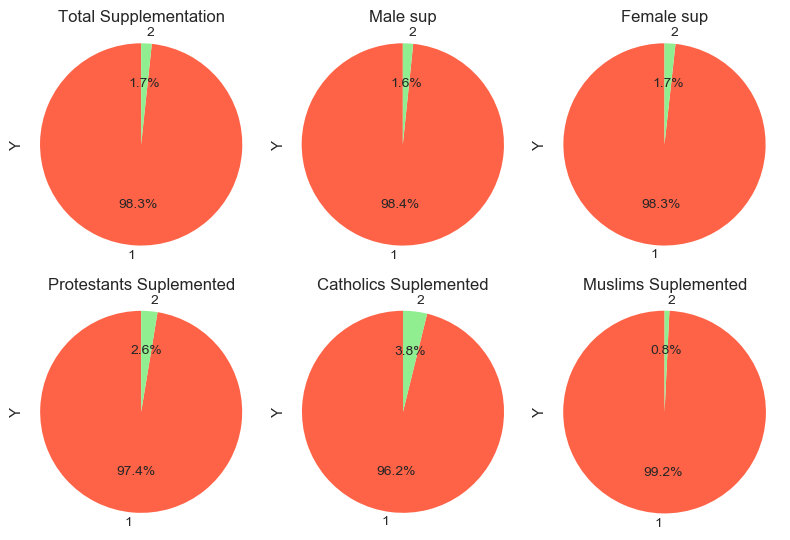

In [16]:

# Plots a pie chart graph of kids who were suplemented against those who were not
plt.subplot2grid((2,3), (0,0))
kwale.Y.value_counts() \
.plot(title='Total Supplementation', **plot_params).axis('equal')


# Sex
df_male = kwale.Y[kwale.Sex == 1.00].value_counts(normalize=True, sort=False)
df_female = kwale.Y[kwale.Sex == 2.00].value_counts(normalize=True, sort=False)

## male 
plt.subplot2grid((2,3),(0,1))
df_male.plot(title='Male sup', **plot_params).axis('equal')

## female s
plt.subplot2grid((2,3),(0,2))
df_female.plot(title='Female sup', **plot_params).axis('equal')


#religion
protestant=kwale.Y[kwale.Religion==1.00].value_counts(normalize=True, sort=False)
catholic=kwale.Y[kwale.Religion==2.00].value_counts(normalize=True, sort=False)
muslim=kwale.Y[kwale.Religion==3.00].value_counts(normalize=True, sort=False)

# plot religion
plt.subplot2grid((2,3),(1,0))
protestant.plot(title='Protestants Suplemented', **plot_params).axis('equal')
plt.subplot2grid((2,3),(1,1))
catholic.plot(title='Catholics Suplemented', **plot_params).axis('equal')
plt.subplot2grid((2,3),(1,2))
muslim.plot(title='Muslims Suplemented', **plot_params).axis('equal')


plt.tight_layout()
plt.show()

### Vitamin A Supplementation pie chart for kwale county

In [17]:
siaya.head()

,Child ID,Mother ID,Child_Age,Sex,Mother_Age,Distance,Transport_Means,Time,Below_5_years,Marital_Status,Polygamy,Together,Education,Employment,Religion,Group_Membership,Place_of_Birth,Unnamed: 17,Place _of_Sup,Income,Healthcare_Exp,Y
0,C001,M001,0.75,1,19.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,2.00,3.00,1.00,2.00,3.00,nan,2.00,19.85,9.93,1.00
1,C002,M002,5.00,1,29.00,2.00,4.00,0.75,1.00,1.00,2.00,1.00,5.00,2.00,2.00,1.00,1.00,nan,3.00,49.63,24.81,1.00
2,C003,M003,2.00,2,29.00,1.00,4.00,0.33,1.00,4.00,nan,nan,3.00,3.00,1.00,1.00,3.00,nan,2.00,29.78,14.89,1.00
3,C004,M004,2.00,1,22.00,0.50,3.00,0.25,1.00,2.00,nan,nan,3.00,3.00,1.00,2.00,3.00,nan,2.00,19.85,9.93,1.00
4,C005,M005,3.00,1,31.00,1.50,4.00,0.75,1.00,1.00,2.00,2.00,3.00,3.00,1.00,1.00,3.00,nan,2.00,49.63,19.85,1.00


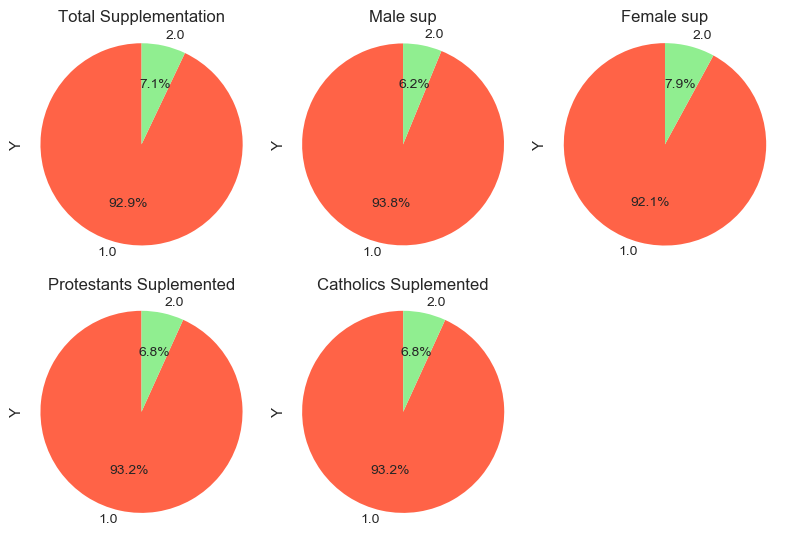

In [18]:
# Plots a pie chart graph of kids who were suplemented against those who were not
plt.subplot2grid((2,3), (0,0))
siaya.Y.value_counts() \
.plot(title='Total Supplementation', **plot_params).axis('equal')


# Sex
df_male = siaya.Y[siaya.Sex == 1.00].value_counts(normalize=True, sort=False)
df_female = siaya.Y[siaya.Sex == 2.00].value_counts(normalize=True, sort=False)

## male 
plt.subplot2grid((2,3),(0,1))
df_male.plot(title='Male sup', **plot_params).axis('equal')

## female s
plt.subplot2grid((2,3),(0,2))
df_female.plot(title='Female sup', **plot_params).axis('equal')


#religion
protestant=siaya.Y[siaya.Religion==1.00].value_counts(normalize=True, sort=False)
catholic=siaya.Y[siaya.Religion==2.00].value_counts(normalize=True, sort=False)

# plot religion
plt.subplot2grid((2,3),(1,0))
protestant.plot(title='Protestants Suplemented', **plot_params).axis('equal')
plt.subplot2grid((2,3),(1,1))
catholic.plot(title='Catholics Suplemented', **plot_params).axis('equal')




plt.tight_layout()
plt.show()

### distribution stats

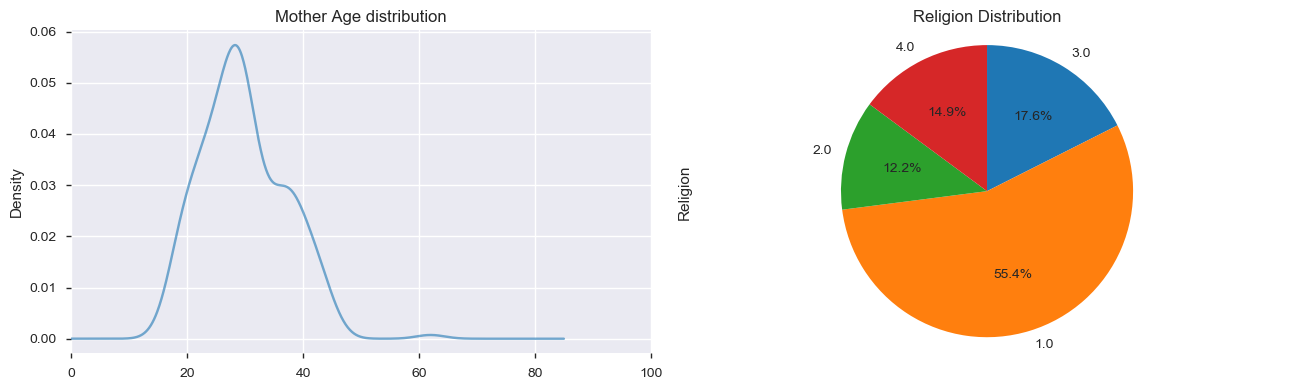

In [19]:
plt.figure(figsize=(13,4))

# plots distribution of the mother age distribution
plt.subplot2grid((1,2), (0,0))
kilifi.Mother_Age.plot(kind='kde', alpha=0.6, title='Mother Age distribution', xlim=(0, 100))

# plots pie chart of religion distribution
plt.subplot2grid((1,2),(0,1))
kilifi.Religion.value_counts(sort=False).plot(kind='pie', title='Religion Distribution', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')

plt.tight_layout()
plt.show()

### Different trends among the counties

#### Vit A supplementation

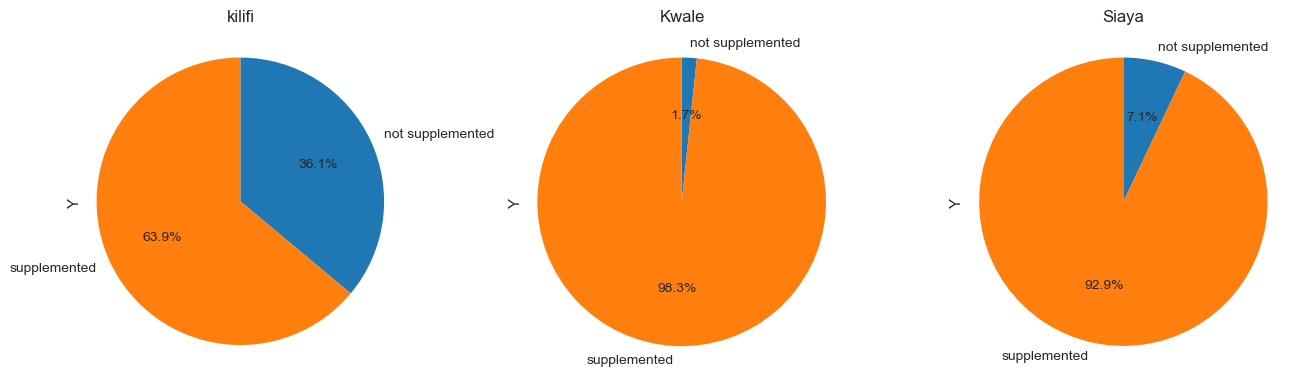

In [20]:
# place of birth
plt.figure(figsize=(13,4))



# plots pie chart of kilifi supplementation distribution
plt.subplot2grid((1,3),(0,0))
kilifi_d.Y.value_counts(sort=False).plot(kind='pie', title='kilifi', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')
# plots pie chart of kwale supplementation distribution
plt.subplot2grid((1,3),(0,1))
kwale_d.Y.value_counts(sort=False).plot(kind='pie', title='Kwale', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')

# plots pie chart of siaya supplementation distribution
plt.subplot2grid((1,3),(0,2))
siaya_d.Y.value_counts(sort=False).plot(kind='pie', title='Siaya', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')


plt.tight_layout()
plt.show()

#### Distance to the health facility

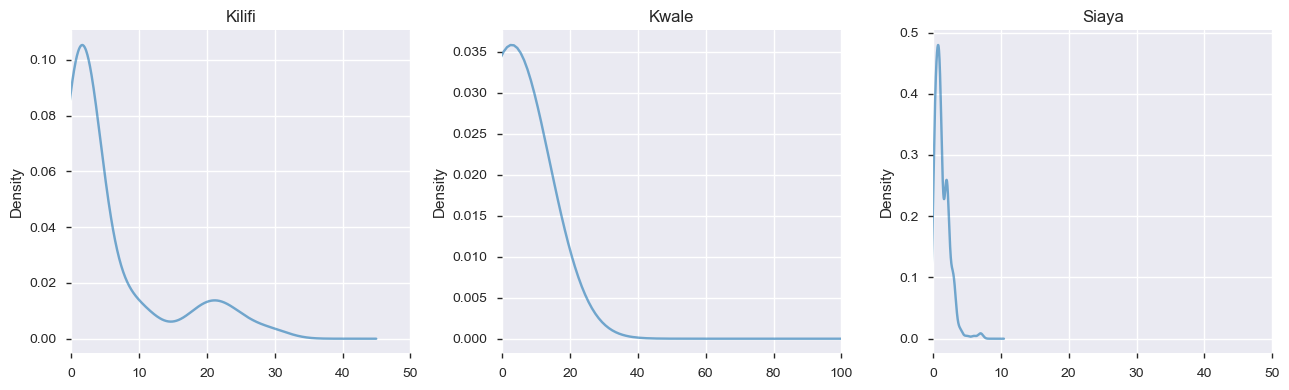

<Figure size 800x550 with 0 Axes>

In [21]:
# Distribution of distance to health facility among the counties
plt.figure(figsize=(13,4))

# plots distribution for kilifi
plt.subplot2grid((1,3), (0,0))
kilifi.Distance.plot(kind='kde', alpha=0.6, title='Kilifi', xlim=(0, 50))

# plots distribution for kwale
plt.subplot2grid((1,3), (0,1))
kwale.Distance.plot(kind='kde', alpha=0.6, title='Kwale', xlim=(0, 100))

# plots distribution for siaya
plt.subplot2grid((1,3), (0,2))
siaya.Distance.plot(kind='kde', alpha=0.6, title='Siaya', xlim=(0, 50))



plt.tight_layout()
plt.show()
plt.savefig('reports/distance.jpeg')

#### Relationship/patterns in place of supplementation in the three countries

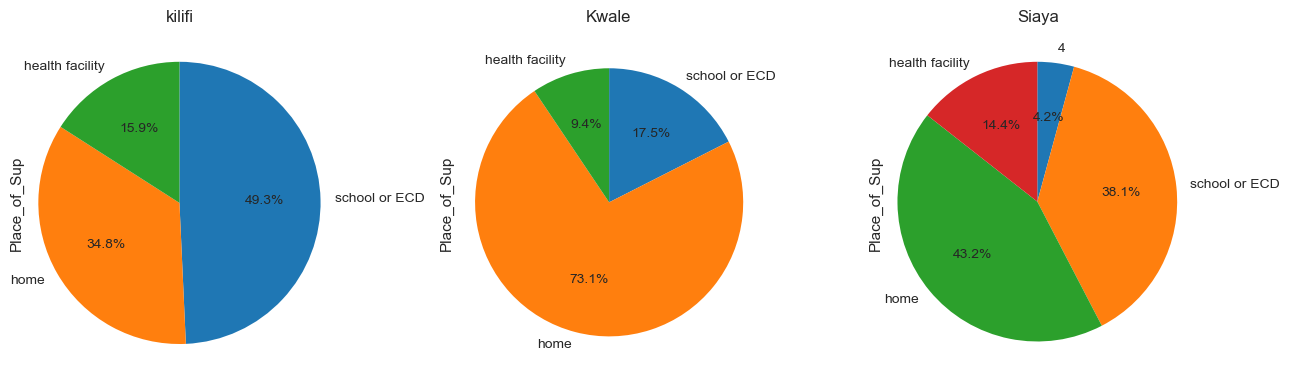

In [22]:
# place of supplementation
plt.figure(figsize=(13,4))



# plots pie chart of kilifi place of supplementation distribution
plt.subplot2grid((1,3),(0,0))
kilifi_d.Place_of_Sup.value_counts(sort=False).plot(kind='pie', title='kilifi', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')
# plots pie chart of kwale place of supplementation distribution
plt.subplot2grid((1,3),(0,1))
kwale_d.Place_of_Sup.value_counts(sort=False).plot(kind='pie', title='Kwale', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')

# plots pie chart of siaya place of supplementation distribution
plt.subplot2grid((1,3),(0,2))
siaya_d.Place_of_Sup.value_counts(sort=False).plot(kind='pie', title='Siaya', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')


plt.tight_layout()
plt.show()

#### Comparison of Income in the three counties

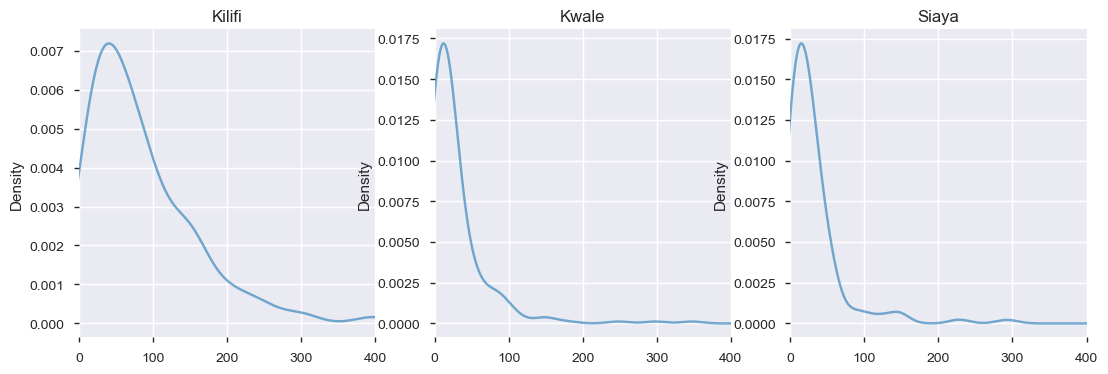

In [23]:
# Distribution of income among the counties
plt.figure(figsize=(13,4))

# plots distribution for kilifi
plt.subplot2grid((1,3), (0,0))
kilifi.Income.plot(kind='kde', alpha=0.6, title='Kilifi', xlim=(0, 400))

# plots distribution for kwale
plt.subplot2grid((1,3), (0,1))
kwale.Income.plot(kind='kde', alpha=0.6, title='Kwale', xlim=(0, 400))

# plots distribution for siaya
plt.subplot2grid((1,3), (0,2))
siaya.Income.plot(kind='kde', alpha=0.6, title='Siaya', xlim=(0, 400))



# plt.tight_layout()
# plt.show()
# plt.savefig('reports/income.jpeg')

#### comparison of employment

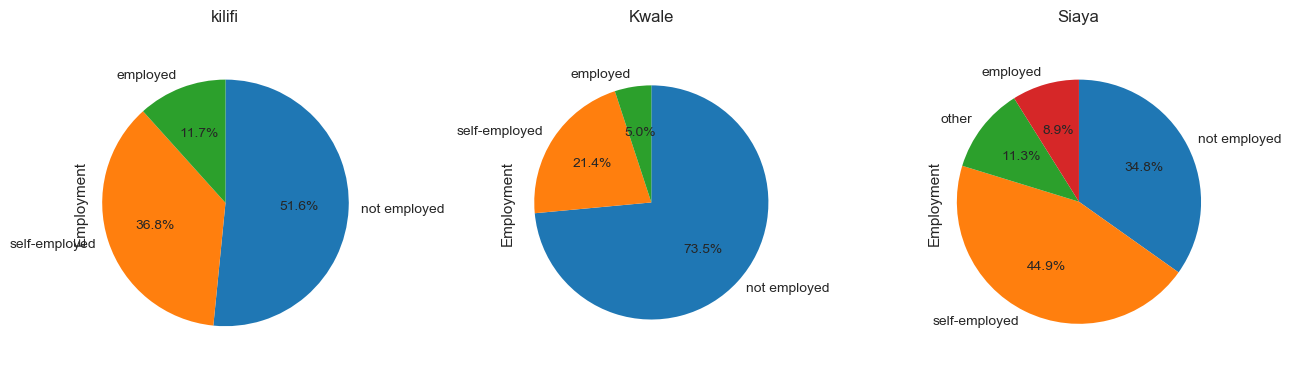

In [24]:

plt.figure(figsize=(13,4))



# plots pie chart of kilifi employment distribution
plt.subplot2grid((1,3),(0,0))
kilifi_d.Employment.value_counts(sort=False).plot(kind='pie', title='kilifi', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')
# plots pie chart of kwale employment distribution
plt.subplot2grid((1,3),(0,1))
kwale_d.Employment.value_counts(sort=False).plot(kind='pie', title='Kwale', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')

# plots pie chart of siaya employment distribution
plt.subplot2grid((1,3),(0,2))
siaya_d.Employment.value_counts(sort=False).plot(kind='pie', title='Siaya', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')


plt.tight_layout()
plt.show()

#### Comparison of the level of education

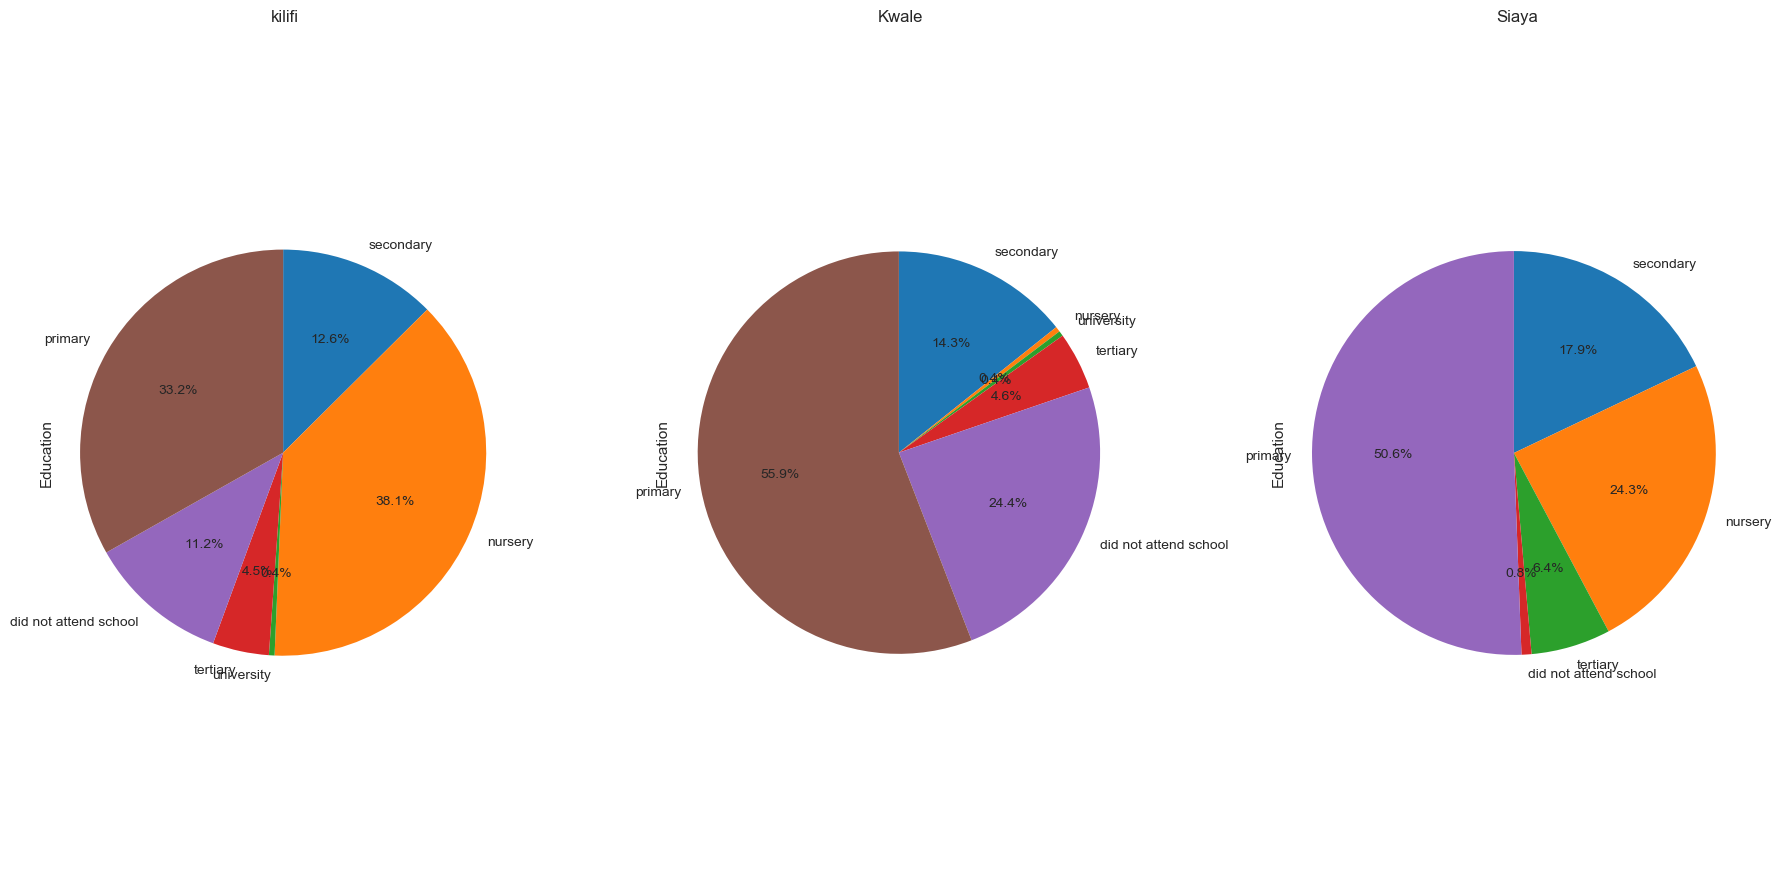

In [25]:
plt.figure(figsize=(18,9))



# plots pie chart of kilifi employment distribution
plt.subplot2grid((1,3),(0,0))
kilifi_d.Education.value_counts(sort=False).plot(kind='pie', title='kilifi', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')
# plots pie chart of kwale employment distribution
plt.subplot2grid((1,3),(0,1))
kwale_d.Education.value_counts(sort=False).plot(kind='pie', title='Kwale', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')

# plots pie chart of siaya employment distribution
plt.subplot2grid((1,3),(0,2))
siaya_d.Education.value_counts(sort=False).plot(kind='pie', title='Siaya', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')


plt.tight_layout()
plt.show()


## ECD Survey Data

In [26]:
# loading data
kilifi_ecd=pd.read_csv("ecd/kilifi_ecd.csv")
kwale_ecd=pd.read_csv("ecd/kwale_ecd.csv")
siaya_ecd=pd.read_csv("ecd/siaya_ecd.csv")


In [27]:
kilifi_ecd.tail()

,Total,supplemented,Reasons,communication,communication-2,communication_instances,percentage_supplemented
50,158,142,Absent,through ward ECD supervisor,through the vilage CHV,2.00,89.87
51,170,158,Absent,ward ECD upervisor communicated to ECD teachers,area CHV visited the school to mobilize,2.00,92.94
52,150,128,Absent,the ward PHO called ECD teacher,ECD teacher mobilized community through children,2.00,85.33
53,75,56,Absent,the ward PHO called the school,ECD mobilized community through children,2.00,74.67
54,131,93,Overage,community distribution team visited ECD to com...,through phone calls,2.00,70.99


#### Reasons for missing supplementation comparison

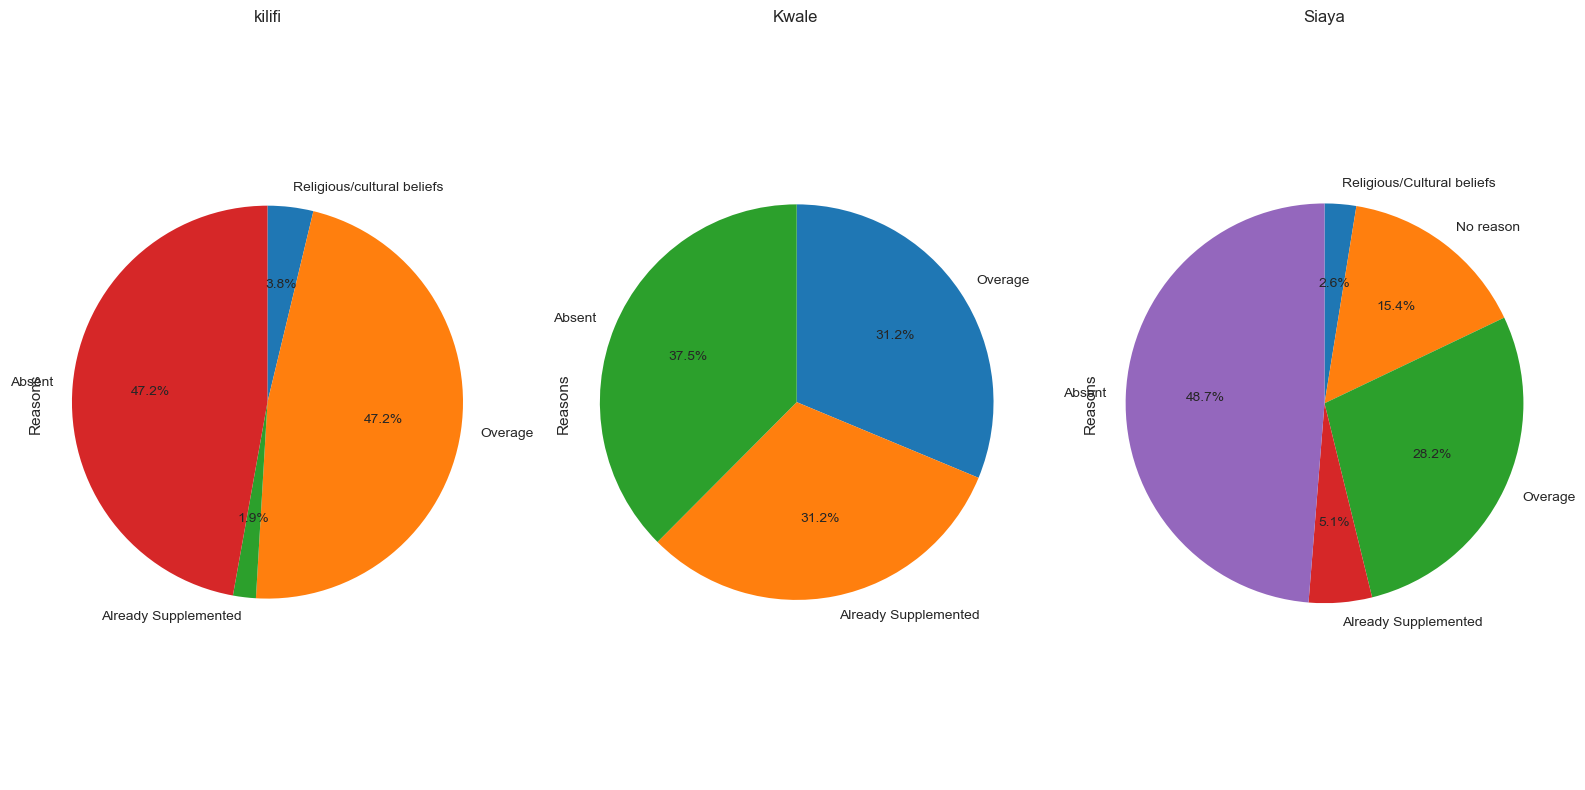

In [28]:
plt.figure(figsize=(16,8))



# plots pie chart of kilifi reasons distribution
plt.subplot2grid((1,3),(0,0))
kilifi_ecd.Reasons.value_counts(sort=False).plot(kind='pie', title='kilifi', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')
# plots pie chart of kwale reasons distribution
plt.subplot2grid((1,3),(0,1))
kwale_ecd.Reasons.value_counts(sort=False).plot(kind='pie', title='Kwale', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')

# plots pie chart of siaya reasons distribution
plt.subplot2grid((1,3),(0,2))
siaya_ecd.Reasons.value_counts(sort=False).plot(kind='pie', title='Siaya', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')


plt.tight_layout()
plt.show()

In [29]:
ecd_df=pd.concat([kilifi_ecd, kwale_ecd, siaya_ecd], ignore_index=True)
ecd_df.head()

,Total,supplemented,Reasons,communication,communication-2,communication_instances,percentage_supplemented
0,63,23,Overage,wrote letter to parents through children,teachers made phone calls to parents,2.00,36.51
1,90,39,Overage,send children verbally to parents,NaN,1.00,43.33
2,40,18,Religious/cultural beliefs,wrote letters to parents,board of management talked to parents verbally,2.00,45.00
3,90,32,Overage,send children verbally to parents,NaN,1.00,35.56
4,78,32,Religious/cultural beliefs,wrote letters to parents,NaN,1.00,41.03


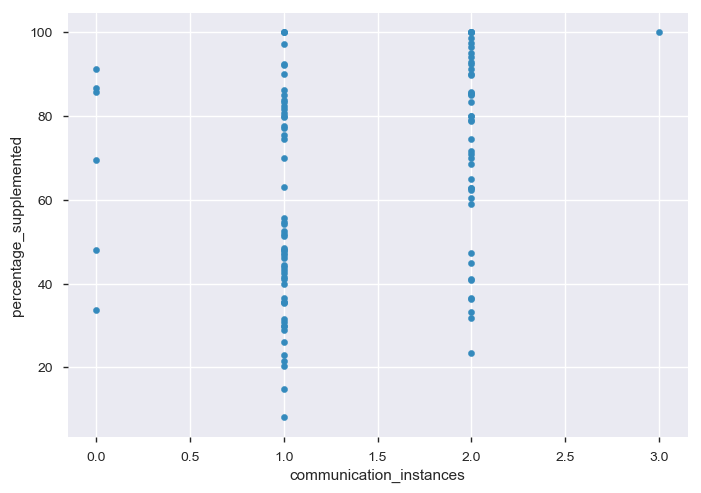

In [30]:
# comparing percentage supplemetation and comunication instances
ecd_df.plot(y="percentage_supplemented", x="communication_instances", kind="scatter")
plt.show()

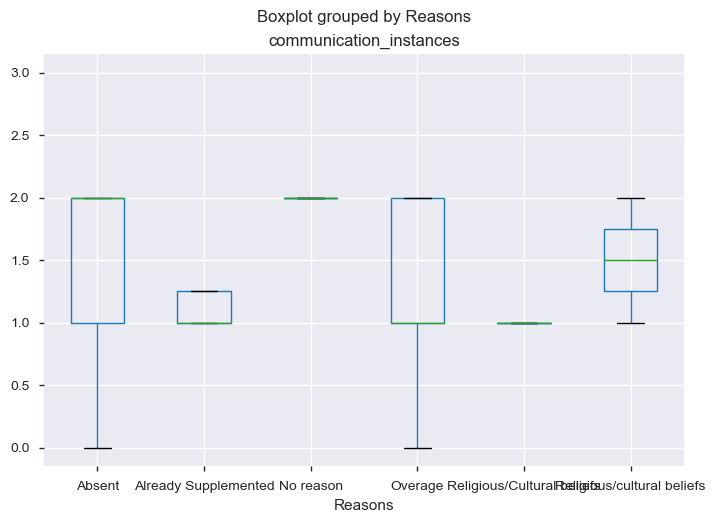

In [31]:
# comparing reasons and communication instances
ecd_df.boxplot(column="communication_instances", by="Reasons" )
plt.show()

## Agregate data analysis

In [32]:
# loading data
# loading data
kilifi_d=pd.read_csv("data_decode/Kilifi.csv")
kwale_d=pd.read_csv("data_decode/Kwale.csv")
siaya_d=pd.read_csv("data_decode/Siaya.csv")
# merging datas set
df=pd.concat([kilifi_d, kwale_d, siaya_d], ignore_index=True)
df.tail()

,Child ID,Mother ID,Child_Age,Sex,Mother_Age,Distance,Transport_Means,Time,Below_5_years,Marital_Status,Polygamy,Together,Education,Employment,Religion,Group_Membership,Place_of_Birth,Unnamed: 17,Place_of_Sup,Income,Healthcare_Exp,Y
713,C252,M252,3.33,2.00,27.00,nan,1.00,1.00,2.00,1.00,2.00,1.00,secondary,not employed,1.00,1.00,hospital,nan,school or ECD,49.63,4.96,supplemented
714,C253,M253,3.42,1.00,30.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,primary,other,1.00,1.00,hospital,nan,school or ECD,29.78,1.99,supplemented
715,C254,M254,4.50,2.00,35.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,tertiary,employed,1.00,nan,hospital,nan,school or ECD,69.48,19.85,supplemented
716,C255,M255,2.50,2.00,29.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,primary,other,1.00,1.00,clinic,nan,4,29.78,4.96,supplemented
717,C256,M256,3.92,2.00,30.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,primary,other,1.00,1.00,clinic,nan,school or ECD,29.78,4.96,supplemented


In [33]:
# dropping unuseful columns
df=df.drop(["Child ID", "Mother ID", "Unnamed: 17"], axis=1)
df.head()

,Child_Age,Sex,Mother_Age,Distance,Transport_Means,Time,Below_5_years,Marital_Status,Polygamy,Together,Education,Employment,Religion,Group_Membership,Place_of_Birth,Place_of_Sup,Income,Healthcare_Exp,Y
0,1.33,1.00,35.00,2.00,3.00,0.25,1.00,1.00,2.00,1.00,primary,self-employed,3.00,1.00,clinic,health facility,29.78,14.89,supplemented
1,1.50,1.00,26.00,2.00,1.00,0.75,3.00,1.00,2.00,2.00,primary,self-employed,3.00,2.00,hospital,health facility,nan,nan,supplemented
2,1.08,1.00,29.00,2.00,3.00,0.17,1.00,1.00,1.00,1.00,secondary,not employed,1.00,1.00,hospital,home,19.85,7.94,supplemented
3,1.50,2.00,28.00,2.00,3.00,0.25,2.00,1.00,2.00,1.00,primary,employed,3.00,2.00,hospital,health facility,44.67,12.90,supplemented
4,nan,2.00,25.00,2.00,1.00,0.83,1.00,1.00,2.00,2.00,secondary,not employed,1.00,2.00,hospital,health facility,nan,17.87,supplemented


In [34]:
# summary analysis
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="reports/data.html")

(-1.1092337657587938,
 1.1110130388613846,
 -1.1092944001647376,
 1.1004426074911342)

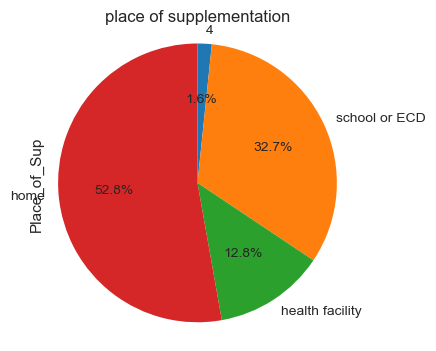

In [35]:
plt.figure(figsize=(13,4))



# plots pie chart of place of supplementation distribution
plt.subplot2grid((1,3),(0,0))
df.Place_of_Sup.value_counts(sort=False).plot(kind='pie', title='place of supplementation', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')

### Religion supplementation dist

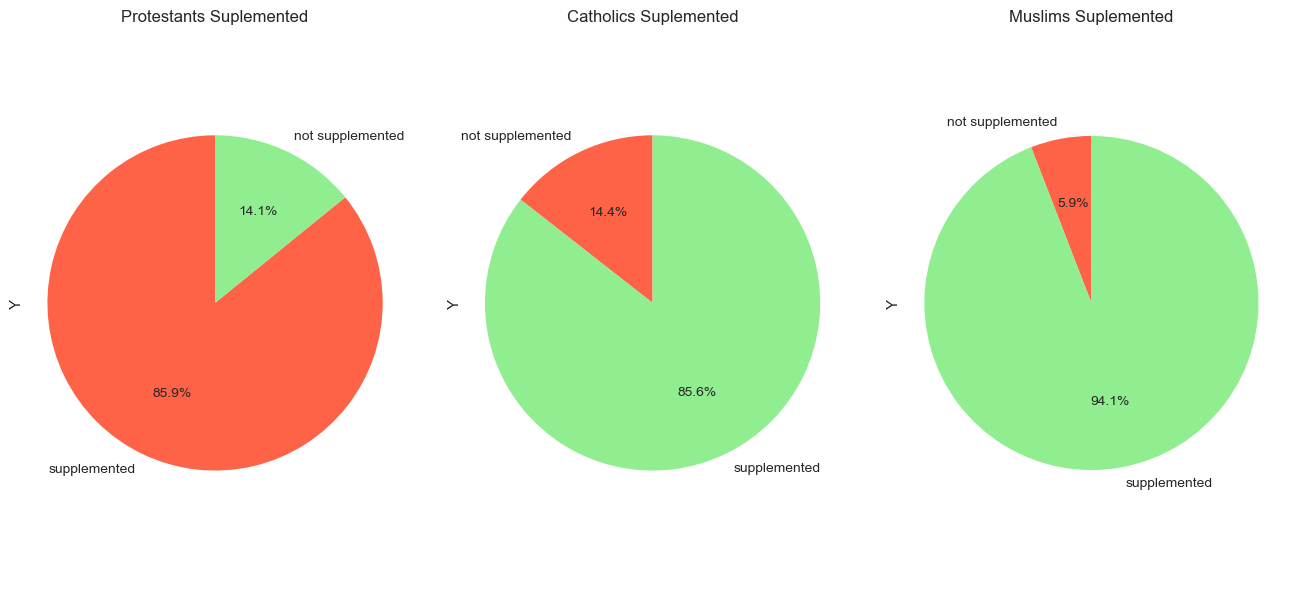

In [41]:
plt.figure(figsize=(13,6))
# Plots a pie chart graph of kids who were suplemented against those who were not
plt.subplot2grid((1,3), (0,0))
df.Y.value_counts() \
.plot(title='Total Supplementation', **plot_params).axis('equal')


#religion
protestant=df.Y[df.Religion==1.00].value_counts(normalize=True, sort=False)
catholic=df.Y[df.Religion==2.00].value_counts(normalize=True, sort=False)
muslim=df.Y[df.Religion==3.00].value_counts(normalize=True, sort=False)


# plot religion
plt.subplot2grid((1,3),(0,0))
protestant.plot(title='Protestants Suplemented', **plot_params).axis('equal')
plt.subplot2grid((1,3),(0,1))
catholic.plot(title='Catholics Suplemented', **plot_params).axis('equal')
plt.subplot2grid((1,3),(0,2))
muslim.plot(title='Muslims Suplemented', **plot_params).axis('equal')





plt.tight_layout()
plt.show()